## Importing packages

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  #for image
from os import system
from sklearn import tree

from sklearn.ensemble import BaggingClassifier #for bagging classifier
from sklearn.ensemble import AdaBoostClassifier #for adaptive boosting
from sklearn.ensemble import GradientBoostingClassifier #for gradient boosting
from sklearn.ensemble import RandomForestClassifier #for random forest
from sklearn.preprocessing import LabelEncoder #for lebel encoder

from sklearn.tree import export_graphviz #for exporting dot data
#from sklearn.externals.six import StringIO  #for stringIO
from IPython.display import Image  #for including image
#import pydotplus #for dot data
#import graphviz #for visualizing decision tree
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices



import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('Dataset/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [8]:
data.shape

(45211, 17)

In [9]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

- 10 features are object type and 7 features are int datatype

- As per given data we know that 10 features are of category type,so lets convert the datatype of those features

In [10]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [13]:
data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


- Now all the obect types were changed into the categorical datatype

### Checking the missing values

In [14]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

- In above cell, missing values are not found, so checking columns where unknown is mentioned
- Checking columns which contain string data

In [15]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [16]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [17]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [18]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

**The dataset has unknown values in 'job','education','contact' and 'poutcome' columns**

### Five point summary of numerical attributes

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.

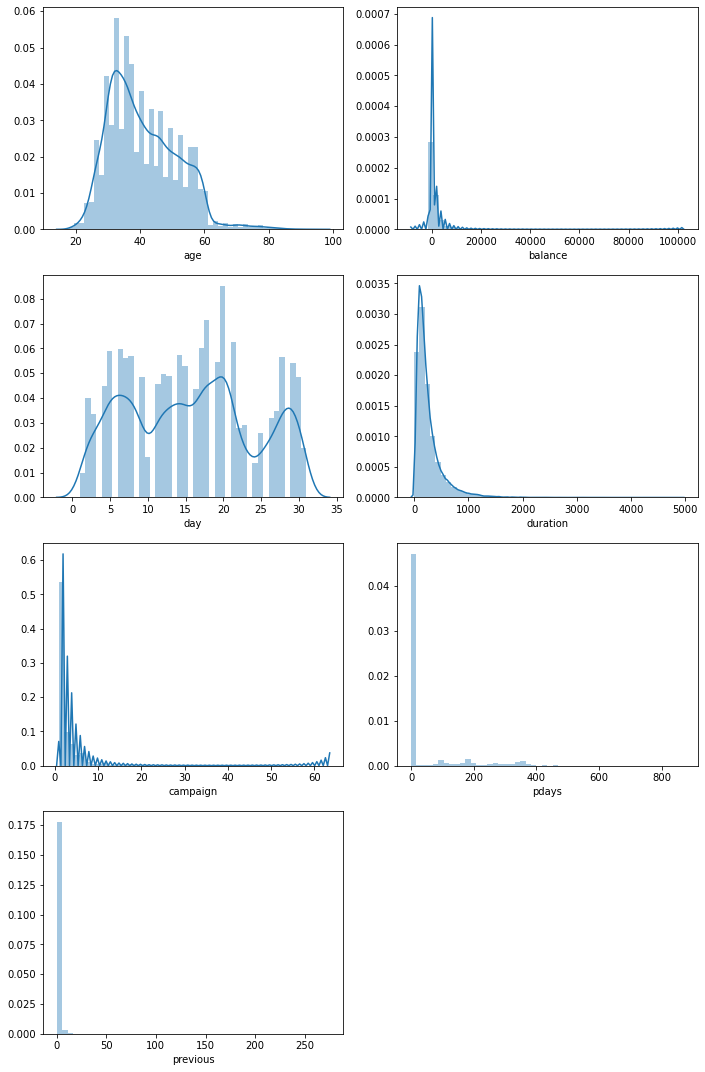

In [29]:
fig , ax = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
ax=ax.flatten() # By flattening the axis we can easily give assign the figure to it 
sns.distplot(data['age'],ax=ax[0])
sns.distplot(data['balance'],ax=ax[1])
sns.distplot(data['day'],ax=ax[2])
sns.distplot(data['duration'],ax=ax[3])
sns.distplot(data['campaign'],ax=ax[4])
sns.distplot(data['pdays'],ax=ax[5])
sns.distplot(data['previous'],ax=ax[6])
fig.tight_layout()
fig.show()
ax.flat[-1].set_visible(False) #To hide the last graph which is not used

**Five point summary understanding:**

* Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
* More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
* Minimum balance is -8019 and maximum balance is 102127
* Minimum age is 18 years and maximum is 95 years

### Distribution of categorical features

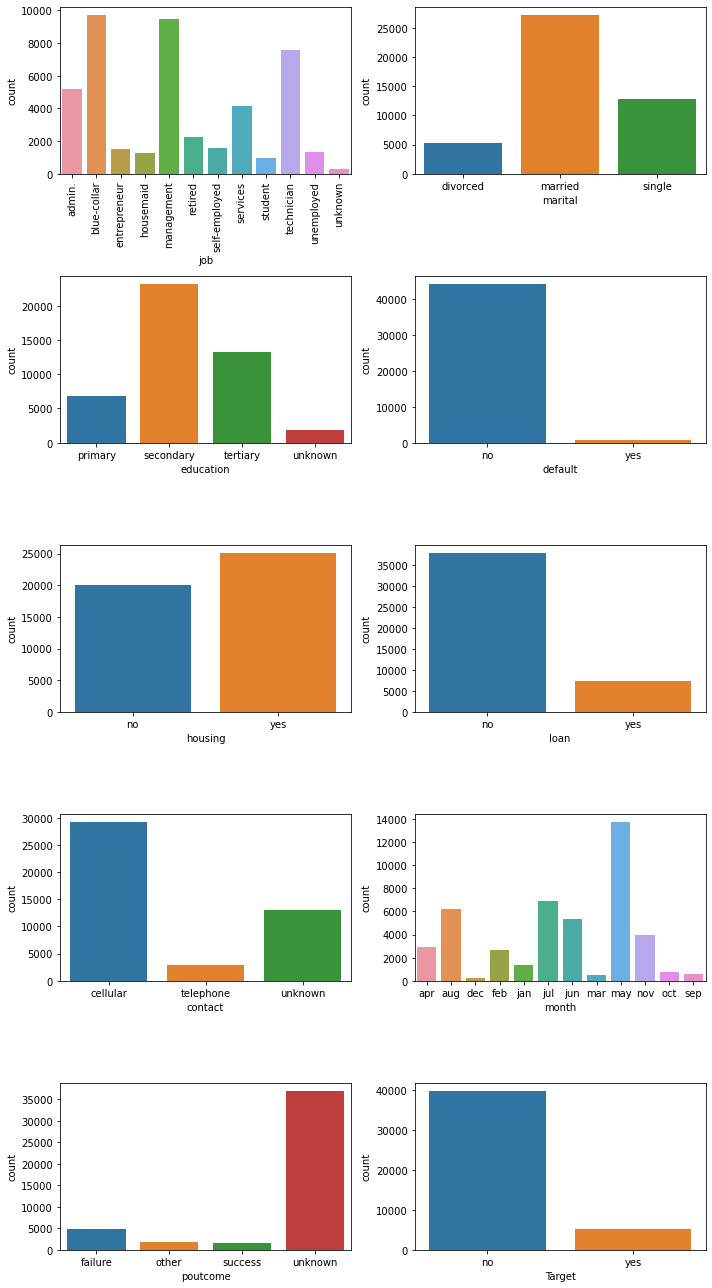

In [33]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions

plot=sns.countplot(x=data['job'],data=data,ax=axe[0]) #Countplot of 'job' 
plt.setp(plot.get_xticklabels(), rotation=90)

sns.countplot(x=data['marital'],data=data,ax=axe[1]) #Countplot of 'marital' 
sns.countplot(x=data['education'],data=data,ax=axe[2]) #Countplot of 'education' 
sns.countplot(x=data['default'],data=data,ax=axe[3]) #Countplot of 'default' 
sns.countplot(x=data['housing'],data=data,ax=axe[4]) #Countplot of 'housing' 
sns.countplot(x=data['loan'],data=data,ax=axe[5]) #Countplot of 'loan' 
sns.countplot(x=data['contact'],data=data,ax=axe[6]) #Countplot of 'contact' 
sns.countplot(x=data['month'],data=data,ax=axe[7]) #Countplot of 'month' 
sns.countplot(x=data['poutcome'],data=data,ax=axe[8]) #Countplot of 'poutcome' 
sns.countplot(x=data['Target'],data=data,ax=axe[9]) #Countplot of 'target' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots


### Understanding from the distributions

- More than 90% customers have no default credit
- Around 88% customers have not subscribed for term deposit
- Most customers have been contacted in may
- Most customers have been contacted by cellular network(mobile phone)
- Number of customers who have housing loan is more than the number of customers who don't have housing loan
- Around 6% customers have credit in default

### Measure of skewness of numerical features

In [36]:
data.skew().to_frame('Skewness measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


As we saw in the graph here also we can see the highly positive skewed values in the data

### Checking the presence of outliers

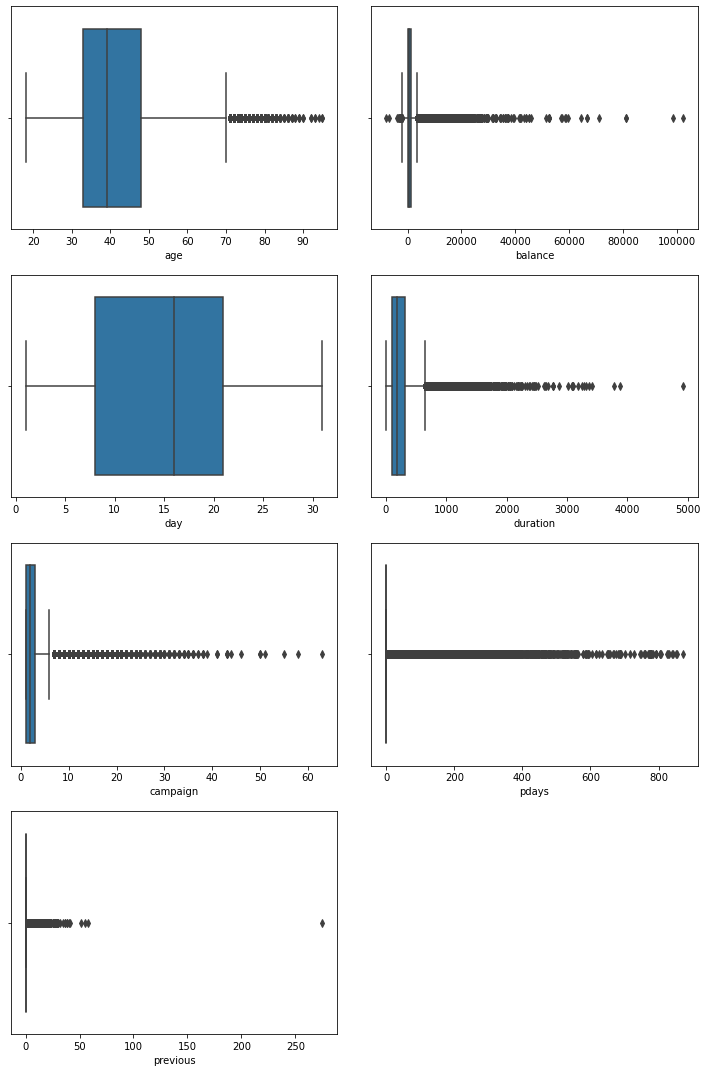

In [38]:
fig , ax = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
ax = ax.flatten()

sns.boxplot(data['age'],ax=ax[0])
sns.boxplot(data['balance'],ax=ax[1])
sns.boxplot(data['day'],ax=ax[2])
sns.boxplot(data['duration'],ax=ax[3])
sns.boxplot(data['campaign'],ax=ax[4])
sns.boxplot(data['pdays'],ax=ax[5])
sns.boxplot(data['previous'],ax=ax[6])
fig.tight_layout()
fig.show()
ax.flat[-1].set_visible(False)

**Understanding from BoxPlot**

- Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
- Values less than 0 are present in 'Balance' column

### Distribution of target column

In [39]:
data['Target'].value_counts().to_frame('Distribution of target')

,Distribution of target
no,39922
yes,5289


We can see that the class is highly imbalanced

## Data Preprocessing

### Label encoding the variables

In [40]:
df_2 = data.copy() #making a copy of dataframe 'df_2'
encoder = LabelEncoder() #creating object of LabelEncoder 
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int) #encoding 'default' column 
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int) #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int) #encoding 'loan' column and assigning 0 no and 1 yes values
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int) #encoding 'housing' column and assigning 0 no and 1 yes values
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int) #encoding 'target' column and assigning 0 no and 1 yes values
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2.head() #displaying head of encoded dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


**Again we have to convert the object datatype which is now numeric into the categorical type**

In [41]:
df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [46]:
df_2.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

### Handling outlier with mean replacement

In [50]:
np.percentile(df_2['balance'],75)

1428.0

In [51]:
meanbal = float(df_2['balance'].mean()) #mean balance
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance']) #replacing with mean

meandur = float(df_2['duration'].mean()) #mean duration
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])#replacing with mean

meancam = float(df_2['campaign'].mean()) #mean campaign
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])#replacing with mean

meanpd = float(df_2['pdays'].mean()) #mean pdays
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])#replacing with mean

meanpr = float(df_2['previous'].mean()) #mean previous
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])#replacing with mean

Boxplots after handling outliers


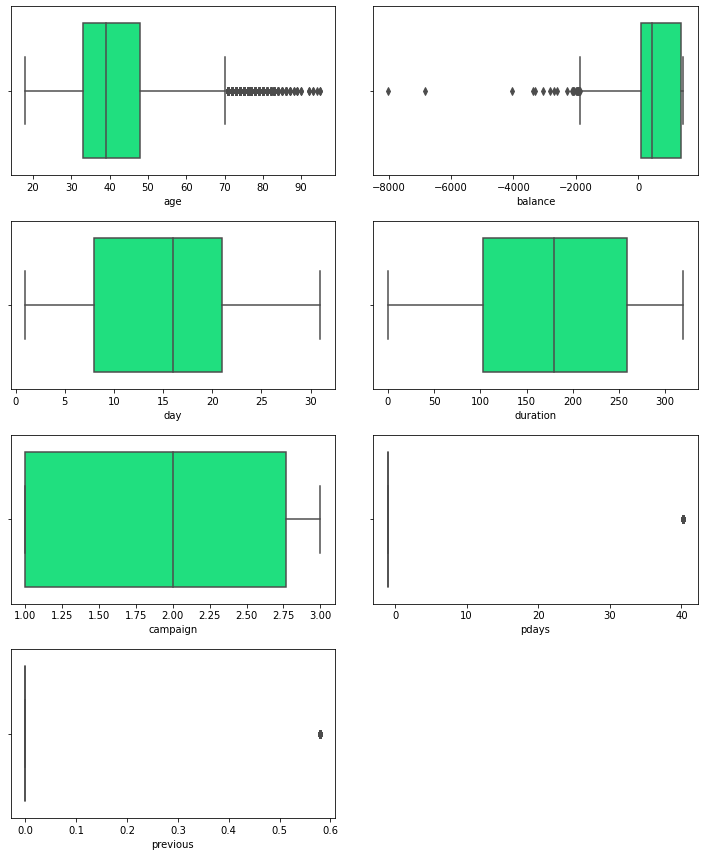

In [54]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df_2,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=df_2,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=df_2,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=df_2,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=df_2,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=df_2,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handling outliers')

### Correlation plot of all the features

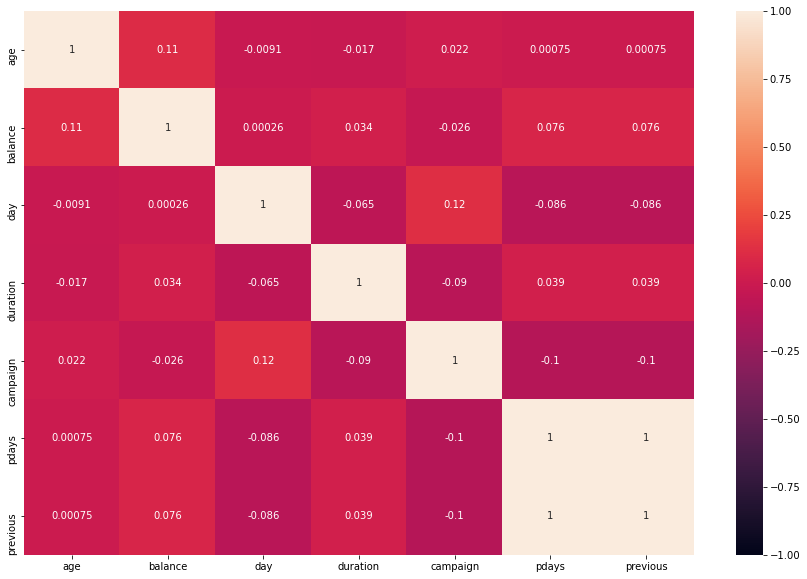

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(df_2.corr(),annot=True,vmax=1,vmin=-1);

**Inference on the correlation plot**

- pdays' and 'previous' are highly correlated

### Removing columns

- 'job','education' and 'contact' attributes contain multiple unknown values.
- As they are specific string values and not numerical so cannot be treated with median, mean replacement
- As per data description, duration attribute is removed to have a realistic prediction
- 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
- 'pdays' and 'previous' are highly correlated so removing any one from both of them.
- Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [64]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


### Pairplot

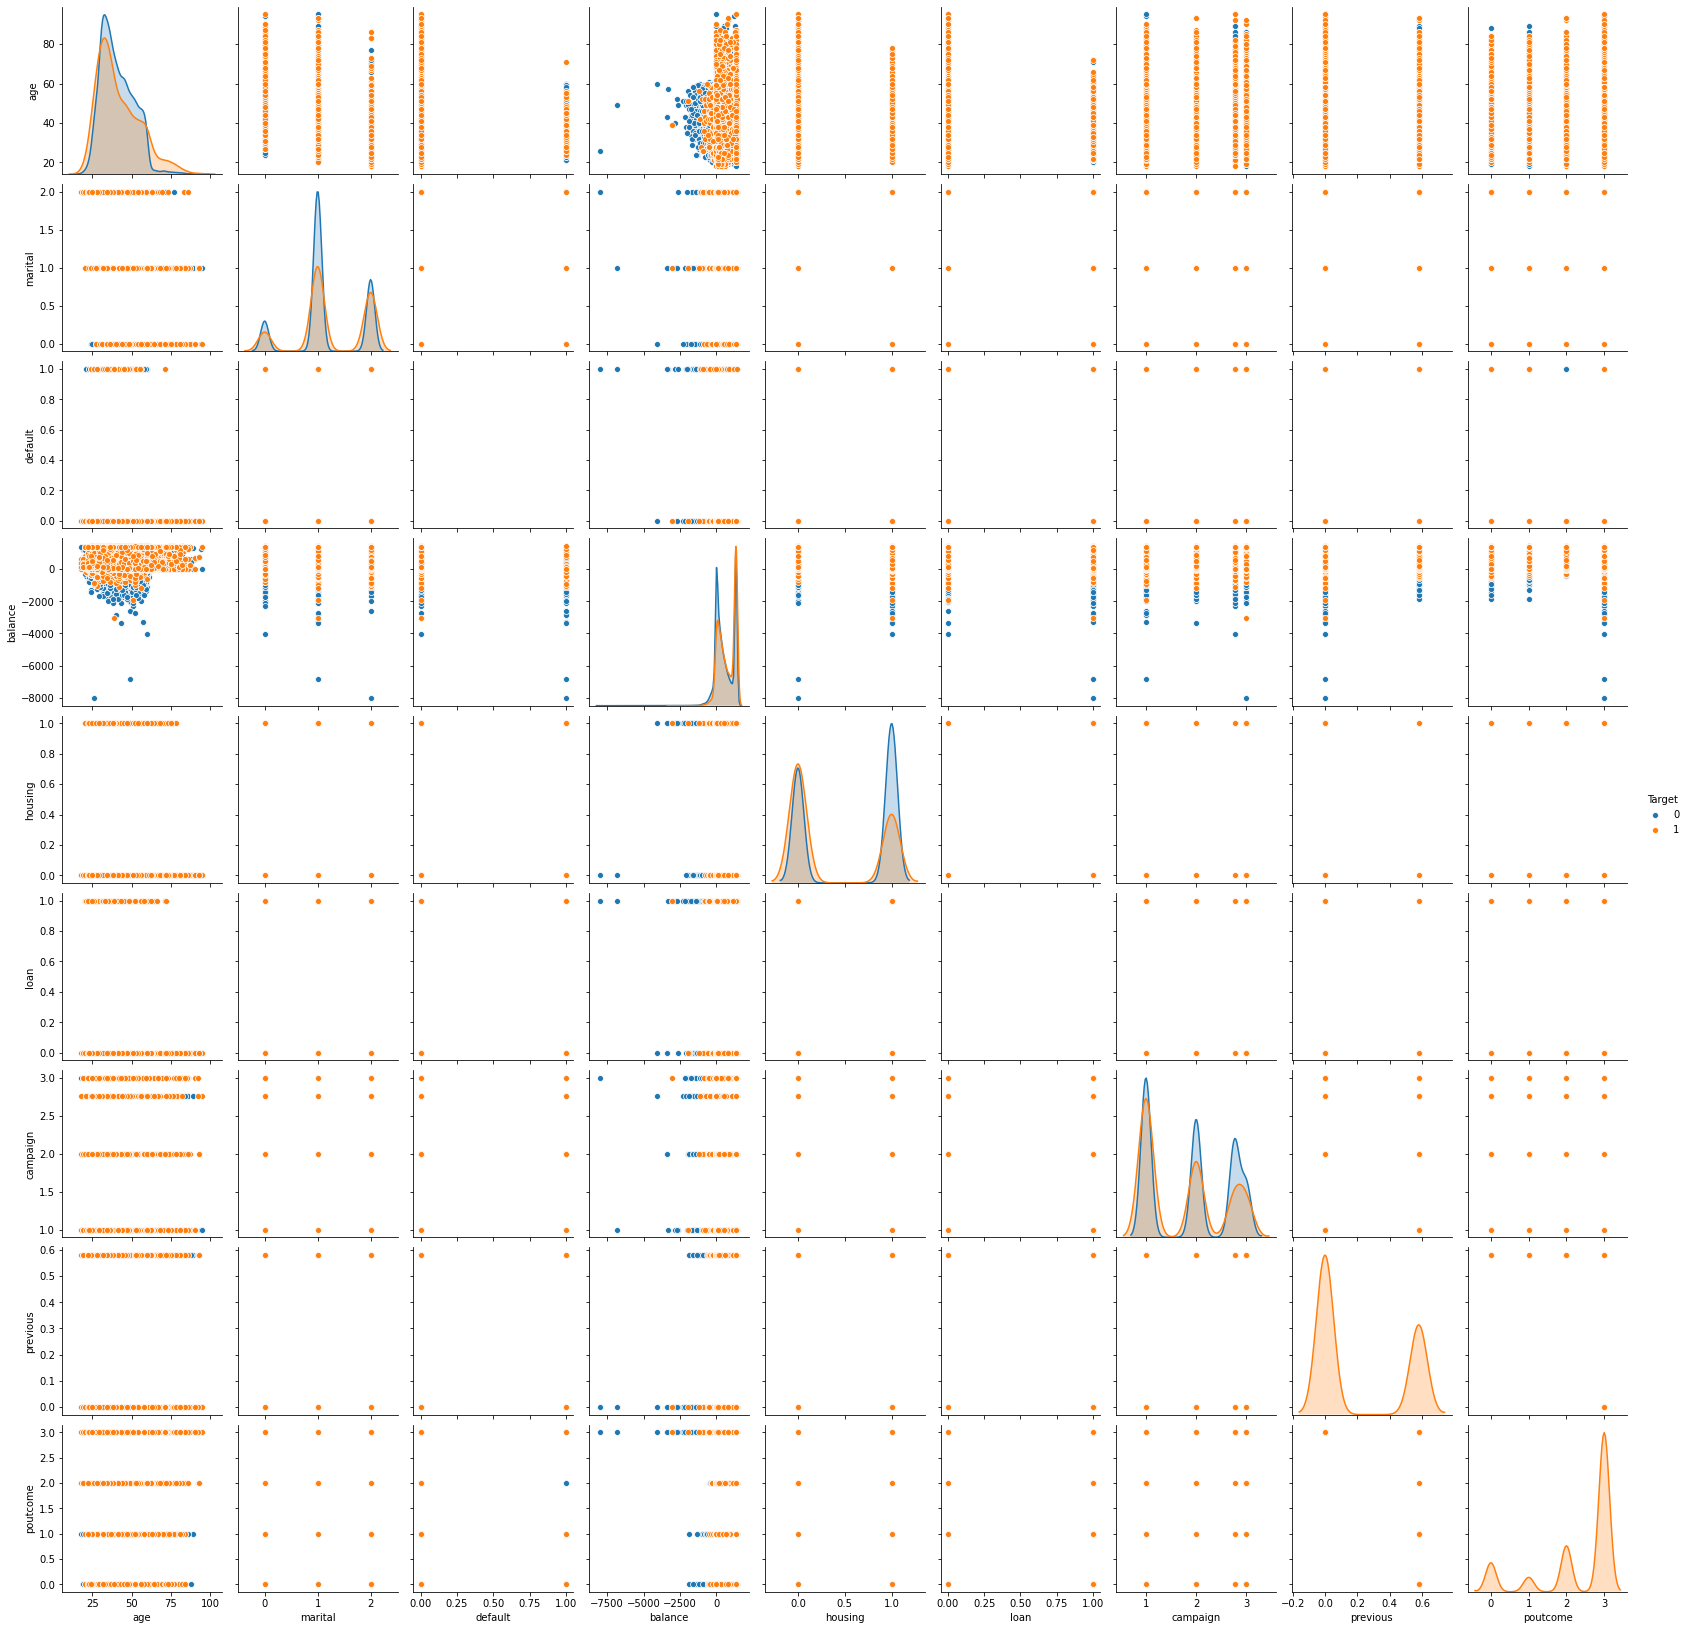

In [68]:
sns.pairplot(df_2,hue='Target')

## Train Test Split

In [67]:
X = df_2.drop('Target',axis=1)
y = df_2['Target']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

## Scaling of Columns

In [70]:
scaler = StandardScaler() #using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) #Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test) #Scaling of Test dataset

## Building the model

### Logistic Regression

In [71]:
logic_r = LogisticRegression(solver='liblinear') 
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled)

In [89]:
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11908    96]
 [ 1325   235]]
----------------------------------------
Accuracy of Logistic Regression :0.90
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12004
           1       0.71      0.15      0.25      1560

    accuracy                           0.90     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.90      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### Naive bayes

In [90]:
NB = GaussianNB()  
NB.fit(X_train_scaled,y_train) 
y_predi = NB.predict(X_test_scaled)  

In [91]:
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10972  1032]
 [ 1080   480]]
------------------------------
Accuracy of Naive Bayes :0.84
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     12004
           1       0.32      0.31      0.31      1560

    accuracy                           0.84     13564
   macro avg       0.61      0.61      0.61     13564
weighted avg       0.84      0.84      0.84     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### K-Nearest Neighbor

In [92]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train_scaled,y_train) 
y_predict = knn.predict(X_test_scaled)  

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10972  1032]
 [ 1080   480]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     12004
           1       0.32      0.31      0.31      1560

    accuracy                           0.84     13564
   macro avg       0.61      0.61      0.61     13564
weighted avg       0.84      0.84      0.84     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### SVC

In [93]:
svc = SVC()  #Instantiate SVC
svc.fit(X_train_scaled,y_train) #Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11870   134]
 [ 1275   285]]
------------------------------
Accuracy of SVC : 0.8961220878796815
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12004
           1       0.68      0.18      0.29      1560

    accuracy                           0.90     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Ensemble methods

### Decision Tree

In [94]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) #Instantiate Decision Tree
dTree.fit(X_train_scaled, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test_scaled) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT)) #for confusion matrix
print('-'*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10794  1210]
 [ 1158   402]]
------------------------------
Accuracy of Decision Tree :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     12004
           1       0.25      0.26      0.25      1560

    accuracy                           0.83     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


#### FEATURE IMPORTANCES OF DECISION TREE

In [95]:
xvar = df_2.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
balance,0.447019
age,0.262429
poutcome,0.096001
campaign,0.078653
marital,0.034035
previous,0.032620
loan,0.025059
housing,0.019709
default,0.004476


#### PRUNING OF DECISION TREE

In [96]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) #Instantiate Decision Tree with max_depth
dTreeR.fit(X_train_scaled, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test_scaled) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR)) #for confusion matrix
print('-'*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11858   146]
 [ 1271   289]]
------------------------------
Accuracy of Decision Tree with Regularization:0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12004
           1       0.66      0.19      0.29      1560

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [97]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
poutcome,0.558863
previous,0.206545
age,0.118966
housing,0.113063
marital,0.002565
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


**We can see that after pruning the decision tree the feature importances has been changed also the accuracy has been improved from 83% to 90%**

### Bagging

In [99]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train) #Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) #for confusion matrix
print('-'*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11602   402]
 [ 1272   288]]
------------------------------
Accuracy of Decision Tree :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12004
           1       0.42      0.18      0.26      1560

    accuracy                           0.88     13564
   macro avg       0.66      0.58      0.59     13564
weighted avg       0.85      0.88      0.85     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### AdaBoost Classifier

In [100]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) #Predict



print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) #for confusion matrix
print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11916    88]
 [ 1333   227]]
------------------------------
Accuracy of KNN :0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12004
           1       0.72      0.15      0.24      1560

    accuracy                           0.90     13564
   macro avg       0.81      0.57      0.59     13564
weighted avg       0.88      0.90      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### Gradient Boosting

In [101]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) #for confusion matrix
print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11914    90]
 [ 1330   230]]
------------------------------
Accuracy of KNN :0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12004
           1       0.72      0.15      0.24      1560

    accuracy                           0.90     13564
   macro avg       0.81      0.57      0.59     13564
weighted avg       0.88      0.90      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### RandomForest Classifier

In [102]:
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)#Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train) #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN )) #for confusion matrix
print('-'*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN )) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11560   444]
 [ 1257   303]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12004
           1       0.41      0.19      0.26      1560

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [103]:
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) #Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)  #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN)) #for confusion matrix
print('-'*30)
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('Accuracy of KNN :{:.2f}'.format(RANN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RANN)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11577   427]
 [ 1259   301]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12004
           1       0.41      0.19      0.26      1560

    accuracy                           0.88     13564
   macro avg       0.66      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


### Models with accuracy scores

In [104]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy),
      ('Random Forest N=500',RANN_accuracy)] #List of accuracy scores of all models

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.896122
5,Decision Tree with Regularization,0.895532
8,Gradient Boosting,0.895311
2,Logistic Regression,0.895237
7,Adaptive Boosting,0.895237
6,Bagging,0.876585
10,Random Forest N=500,0.875700
9,Random Forest N=100,0.874595
1,KNN,0.869729
0,Naive bayes,0.844294


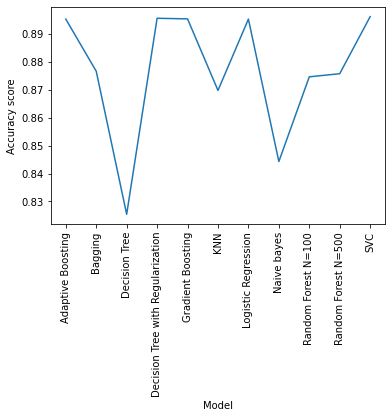

In [105]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

## Conclusion

### Comments on Dataset

- The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models.
- The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.
- Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
- This situation could have been avoided if the datset was balanced.
- Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

### Comments on model

- When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.
- SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data
- The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.
- In Decision Trees, Gradient boosting method always performed better for this dataset.

### Miscellaneous Comments:

- After trying get_dummies the score did not show significant difference as well as I have skipped the get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.
- If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.
- Outlier handeling did not make any significant difference in the accuracy scores of models.